In [1]:
from sklearn.metrics import *
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import numpy as np
import warnings
import pandas as pd

In [3]:
files = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']
for file in files:
    # Find all the .npy files in the directory for this file
    file_path = f"./{file}/"
    npy_files = [f for f in os.listdir(file_path) if f.endswith('.npy') and not f.endswith('.labels.npy')]
    
    # Load all the .npy files and concatenate them into a single array
    combined_array = np.concatenate([np.load(file_path + f) for f in npy_files], axis=0)
    
    # Save the combined array to a new .npy file with the same name as the directory
    np.save(f"./{file}.npy", combined_array)

In [4]:
comcuc = np.load('comcuc.npy')
cowpig1 = np.load('cowpig1.npy')
eucdov = np.load('eucdov.npy')
eueowl1 = np.load('eueowl1.npy')
grswoo = np.load('grswoo.npy')
tawowl1 = np.load('tawowl1.npy')
mean_comcuc = np.mean(comcuc, axis=0)
mean_cowpig1 = np.mean(cowpig1, axis=0)
mean_eucdov = np.mean(eucdov, axis=0)
mean_eueowl1 = np.mean(eueowl1, axis=0)
mean_grswoo = np.mean(grswoo, axis=0)
mean_tawowl1 = np.mean(tawowl1, axis=0)

combined_means = np.vstack((mean_comcuc, mean_cowpig1, mean_eucdov, mean_eueowl1, mean_grswoo, mean_tawowl1))
print(combined_means)

[[6.0702730e-02 2.4602273e-02 2.8891729e+03 ... 3.0834017e+00
  2.5547047e+00 2.1070662e+00]
 [1.2225883e-01 2.2761168e-02 1.1199287e+03 ... 2.7688673e+00
  2.1740642e+00 1.8281840e+00]
 [1.2542319e-01 2.6298169e-02 1.1900988e+03 ... 2.8172343e+00
  2.2098179e+00 1.7782594e+00]
 [9.5825233e-02 1.4358594e-02 1.7134257e+03 ... 2.7726290e+00
  1.9657502e+00 1.2492429e+00]
 [2.1247388e-01 3.1567492e-02 1.7008270e+03 ... 2.8132713e+00
  2.1981423e+00 1.9585291e+00]
 [1.6502920e-01 2.0176120e-02 1.9709248e+03 ... 2.9978886e+00
  2.2140536e+00 1.5042468e+00]]


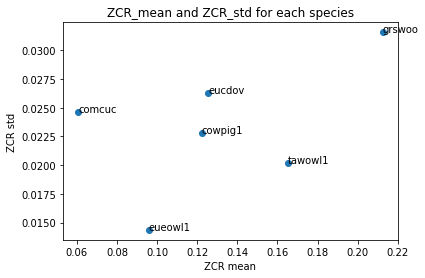

In [5]:
# ZCR mean and std
labels = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']
zcr_mean = combined_means[:, 0]
zcr_std = combined_means[:, 1]
# Combine selected columns into a new array
new_array = np.column_stack((zcr_mean, zcr_std))

plt.scatter(zcr_mean, zcr_std)
for i, label in enumerate(labels):
    plt.annotate(label, (zcr_mean[i], zcr_std[i]))
plt.xlabel('ZCR mean')
plt.ylabel('ZCR std')
plt.title('ZCR_mean and ZCR_std for each species')
plt.show()

[2876.277  1099.9979 1181.0654 1686.545  1686.2654 1947.3365]


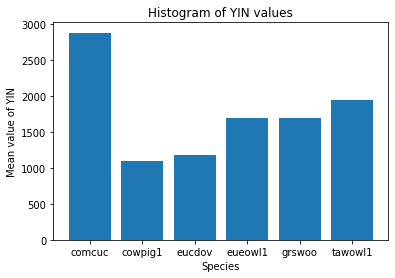

In [6]:
labels = ['comcuc', 'cowpig1', 'eucdov', 'eueowl1', 'grswoo', 'tawowl1']
selected_cols = combined_means[:, 2:16]
row_means = selected_cols.mean(axis=1)
print(row_means)
plt.bar(labels, row_means)
plt.xlabel('Species')
plt.ylabel('Mean value of YIN')
plt.title('Histogram of YIN values')
plt.show()

In [9]:
corr_array = []
for i in range(combined_means.shape[1]):
    for j in range(i+1, combined_means.shape[1]):
        corr, _ = pearsonr(combined_means[:, i], combined_means[:, j])
        corr_array.append((i, j, corr))

# Sort correlations by absolute value
corr_array = sorted(corr_array, key=lambda x: abs(x[2]), reverse=True)

# Print top 10 correlations
for i in range(10):
    idx1, idx2, corr = corr_array[i]
    print(f"Features {idx1} and {idx2} have correlation {corr}")

Features 530 and 531 have correlation 0.9999999990956917
Features 4 and 15 have correlation 0.99998484557768
Features 526 and 528 have correlation 0.9999848364243397
Features 6 and 7 have correlation 0.9999839406345256
Features 526 and 527 have correlation 0.9999711075064647
Features 527 and 528 have correlation 0.9999693117496316
Features 527 and 529 have correlation 0.9999664865151316
Features 4 and 12 have correlation 0.9999613994746271
Features 5 and 7 have correlation 0.9999604647967137
Features 2 and 11 have correlation 0.9999583239321849


In [10]:
# Create a dictionary to map feature indices to feature names
feature_dict = {i: feature_names[i] for i in range(len(feature_names))}

# Create a figure with multiple subplots
fig, axes = plt.subplots(5, 2, figsize=(15, 20))  # 5 rows, 2 columns of subplots
fig.tight_layout(pad=5)  # Add padding between subplots

# Plot the results and print out feature names
for i in range(20):
    idx1, idx2, corr = corr_array[i]
    feature_name1 = feature_dict[idx1]
    feature_name2 = feature_dict[idx2]
    row = i // 2  # Row index of the subplot
    col = i % 2  # Column index of the subplot
    axes[row, col].scatter(combined_means[:, idx1], combined_means[:, idx2], label=f'Correlation: {corr:.4f}')
    axes[row, col].set_xlabel(feature_name1)
    axes[row, col].set_ylabel(feature_name2)
    axes[row, col].set_title(f'Features {feature_name1} and {feature_name2} Correlation Scatter Plot')
    axes[row, col].legend()
    print(f"Features {idx1} ({feature1}) and {idx2} ({feature2}) have correlation {corr}")
plt.show

NameError: name 'feature_names' is not defined